In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from platform import python_version
python_version()

'3.11.4'

In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import ListedColormap

C:\Users\dolin\AppData\Local\Temp\ipykernel_20652\736446681.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
guid_id_vals = [11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36]
guid_id_colors = ["#ff0000", "#00d30e", "#0000ff", "#ffae00", "#cd00cd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7"]

# Create a ListedColormap using the defined colors
guid_id_cmap = ListedColormap(guid_id_colors)

guid_id_cdict = dict(map(lambda v,c : (v,c) , guid_id_vals, guid_id_colors))

print(guid_id_cdict)

{11: '#ff0000', 12: '#00d30e', 13: '#0000ff', 14: '#ffae00', 15: '#cd00cd', 20: '#8c564b', 21: '#e377c2', 22: '#7f7f7f', 23: '#bcbd22', 24: '#17becf', 25: '#aec7e8', 26: '#ffbb78', 31: '#98df8a', 32: '#ff9896', 33: '#c5b0d5', 34: '#c49c94', 35: '#f7b6d2', 36: '#c7c7c7'}


In [5]:
data = pd.read_csv('ops3_log.csv')


data['time'] = data['loop_dt'].cumsum()

data.head()

entry_data = data[data['guid_id'] < 20]
taem_data = data[data['guid_id'] >= 20]


,guid_id,loop_dt,rwy_alt,vel,surfv,mach,hdot,lat,long,range,...,nz,drag,eow,prog_pch,prog_roll,prog_yaw,flap_defl,spdbk_defl,Unnamed: 19,time
0,11,0.56,120500.500186,7828.653169,7828.653169,20.485312,-129.876884,63.121195,0.227766,7947.622721,...,-0.000044,0.027335,1.097989e+07,-14.063134,3.882072,-27.127767,0.0,0.0,NaN,0.56
1,11,0.58,120425.052227,7828.727963,7828.727963,20.508383,-129.909448,63.153837,0.173908,7943.185581,...,-0.000141,0.026454,1.097982e+07,-9.630078,4.358518,-21.994696,0.0,0.0,NaN,1.14
2,11,0.58,120349.550337,7828.779727,7828.779727,20.531508,-129.936578,63.185336,0.119933,7938.748455,...,-0.000035,0.025347,1.097968e+07,-4.126787,4.259037,-16.025295,0.0,0.0,NaN,1.72
3,11,0.60,120271.388728,7828.793574,7828.793574,20.554652,-129.959013,63.217942,0.067707,7934.158340,...,-0.000010,0.026498,1.097944e+07,2.414301,3.388342,-9.924079,0.0,0.0,NaN,2.32
4,11,0.56,120198.377541,7828.811186,7828.811186,20.577123,-129.999542,63.249407,0.015372,7929.874235,...,0.000015,0.026977,1.097923e+07,9.777751,1.734775,-4.559561,0.0,0.0,NaN,2.88


In [6]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

Text(0.5, 1.0, 'Trajectory on 2D Earth Map (Cartopy)')

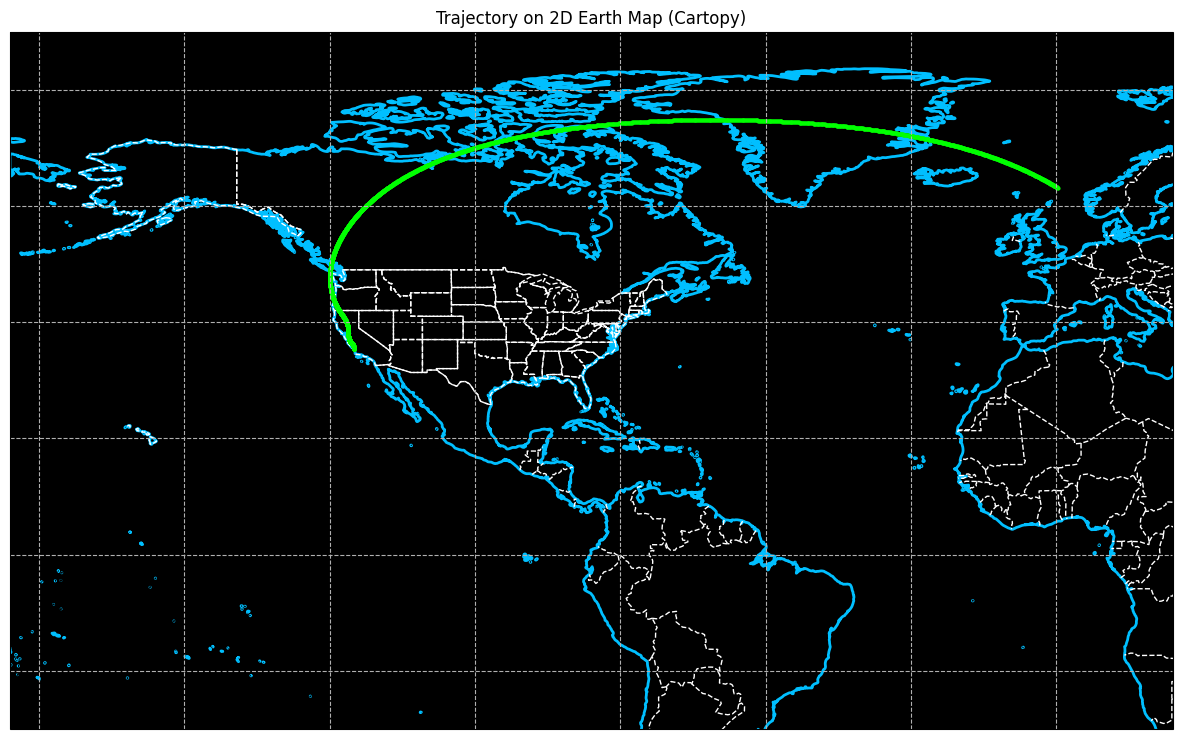

Text(0.5, 1.0, 'Trajectory on 2D Earth Map (Cartopy)')

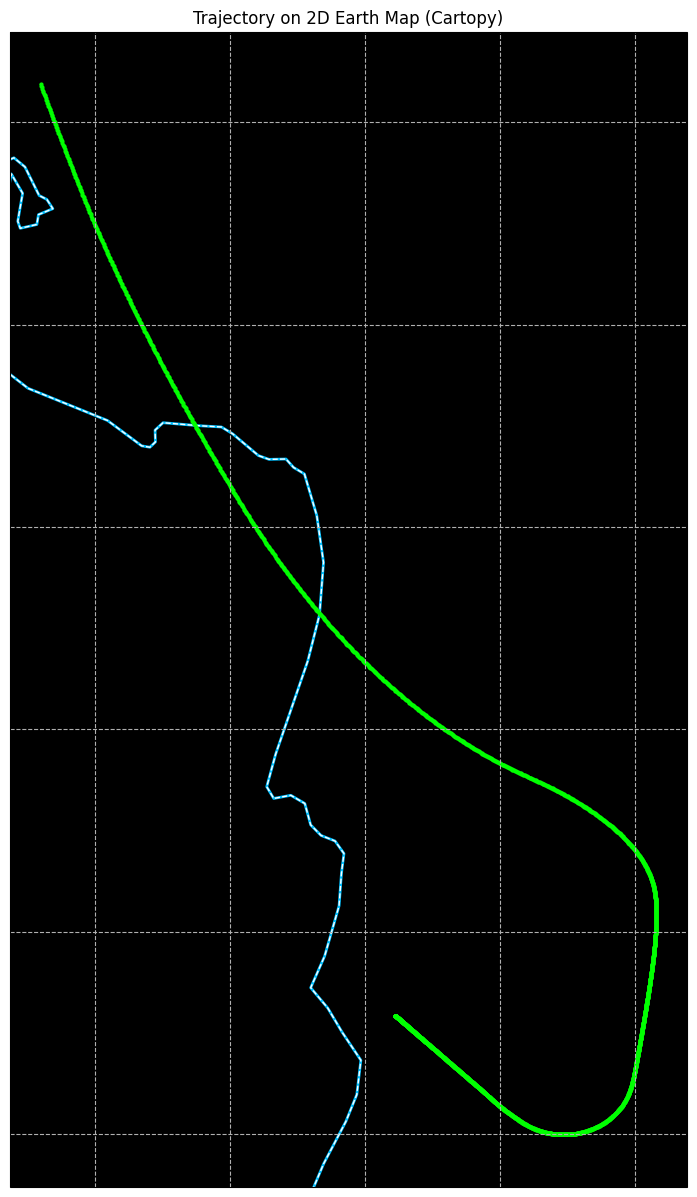

In [32]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.plot(entry_data['long'], entry_data['lat'], marker='o', linestyle='-', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_extent([-180, 20, -30, 90], crs=ccrs.PlateCarree())
ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')

# Add coastlines and gridlines
ax.gridlines(linestyle='--')

# Add title
plt.title('Trajectory on 2D Earth Map (Cartopy)')

# Show the plot
plt.show()



fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.plot(taem_data['long'], taem_data['lat'], marker='o', linestyle='-', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')


# Add coastlines and gridlines
ax.gridlines(linestyle='--')

# Add title
plt.title('Trajectory on 2D Earth Map (Cartopy)')

# Show the plot
plt.show()

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'delaz')

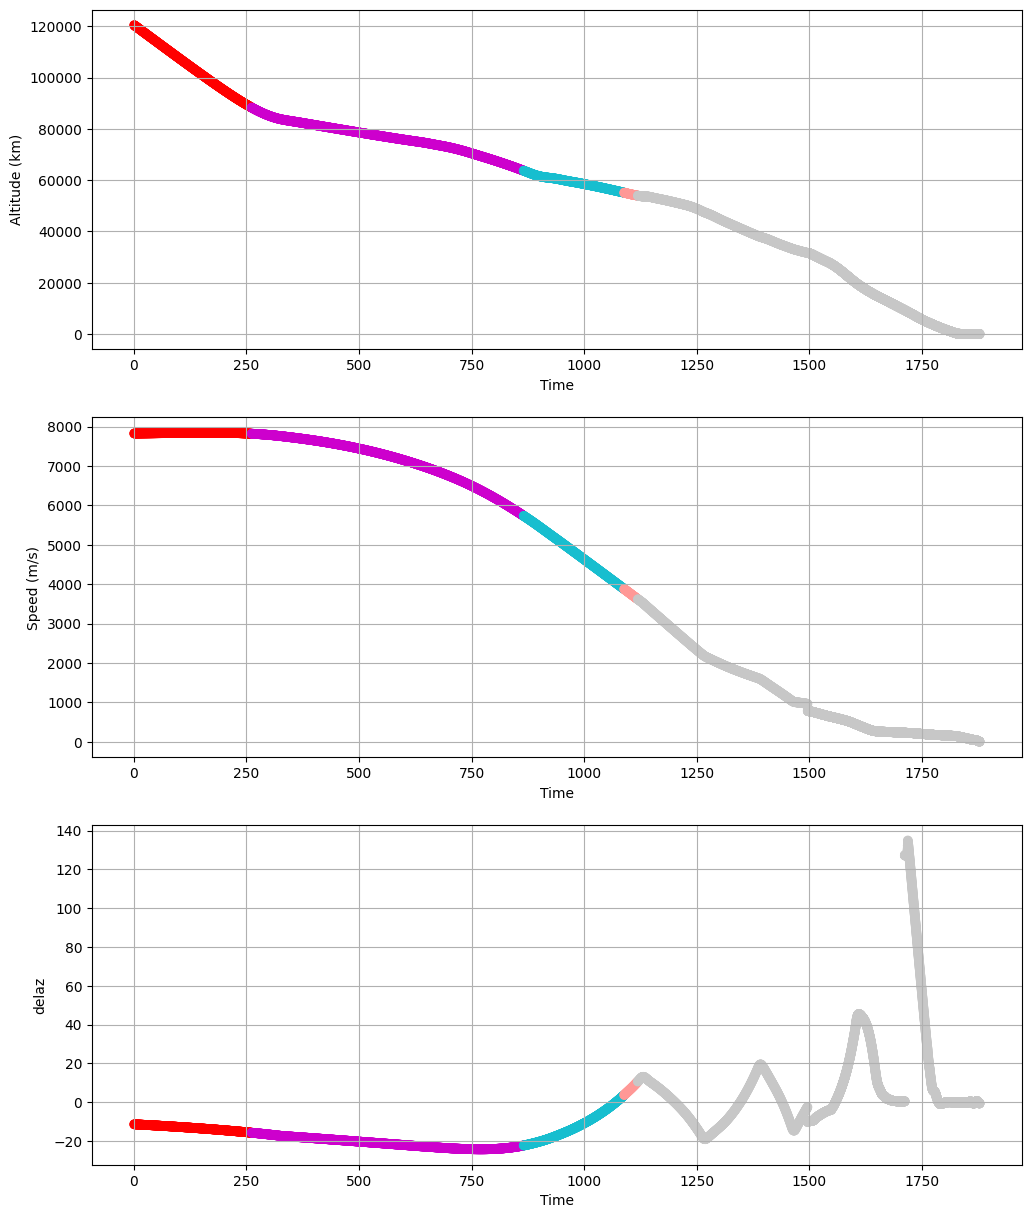

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5 * 3))

plt_ = ax[0]
plt1 = plt_.scatter(data['time'], data['rwy_alt'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt2 = plt_.scatter(data['time'], data['surfv'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()


plt_ = ax[2]
plt2 = plt_.scatter(data['time'], data['delaz'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('delaz')
plt_.grid()


Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Roll °')

(-200.0, 150.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'hdot')

(0.0, 52.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'drag (ft/s)')

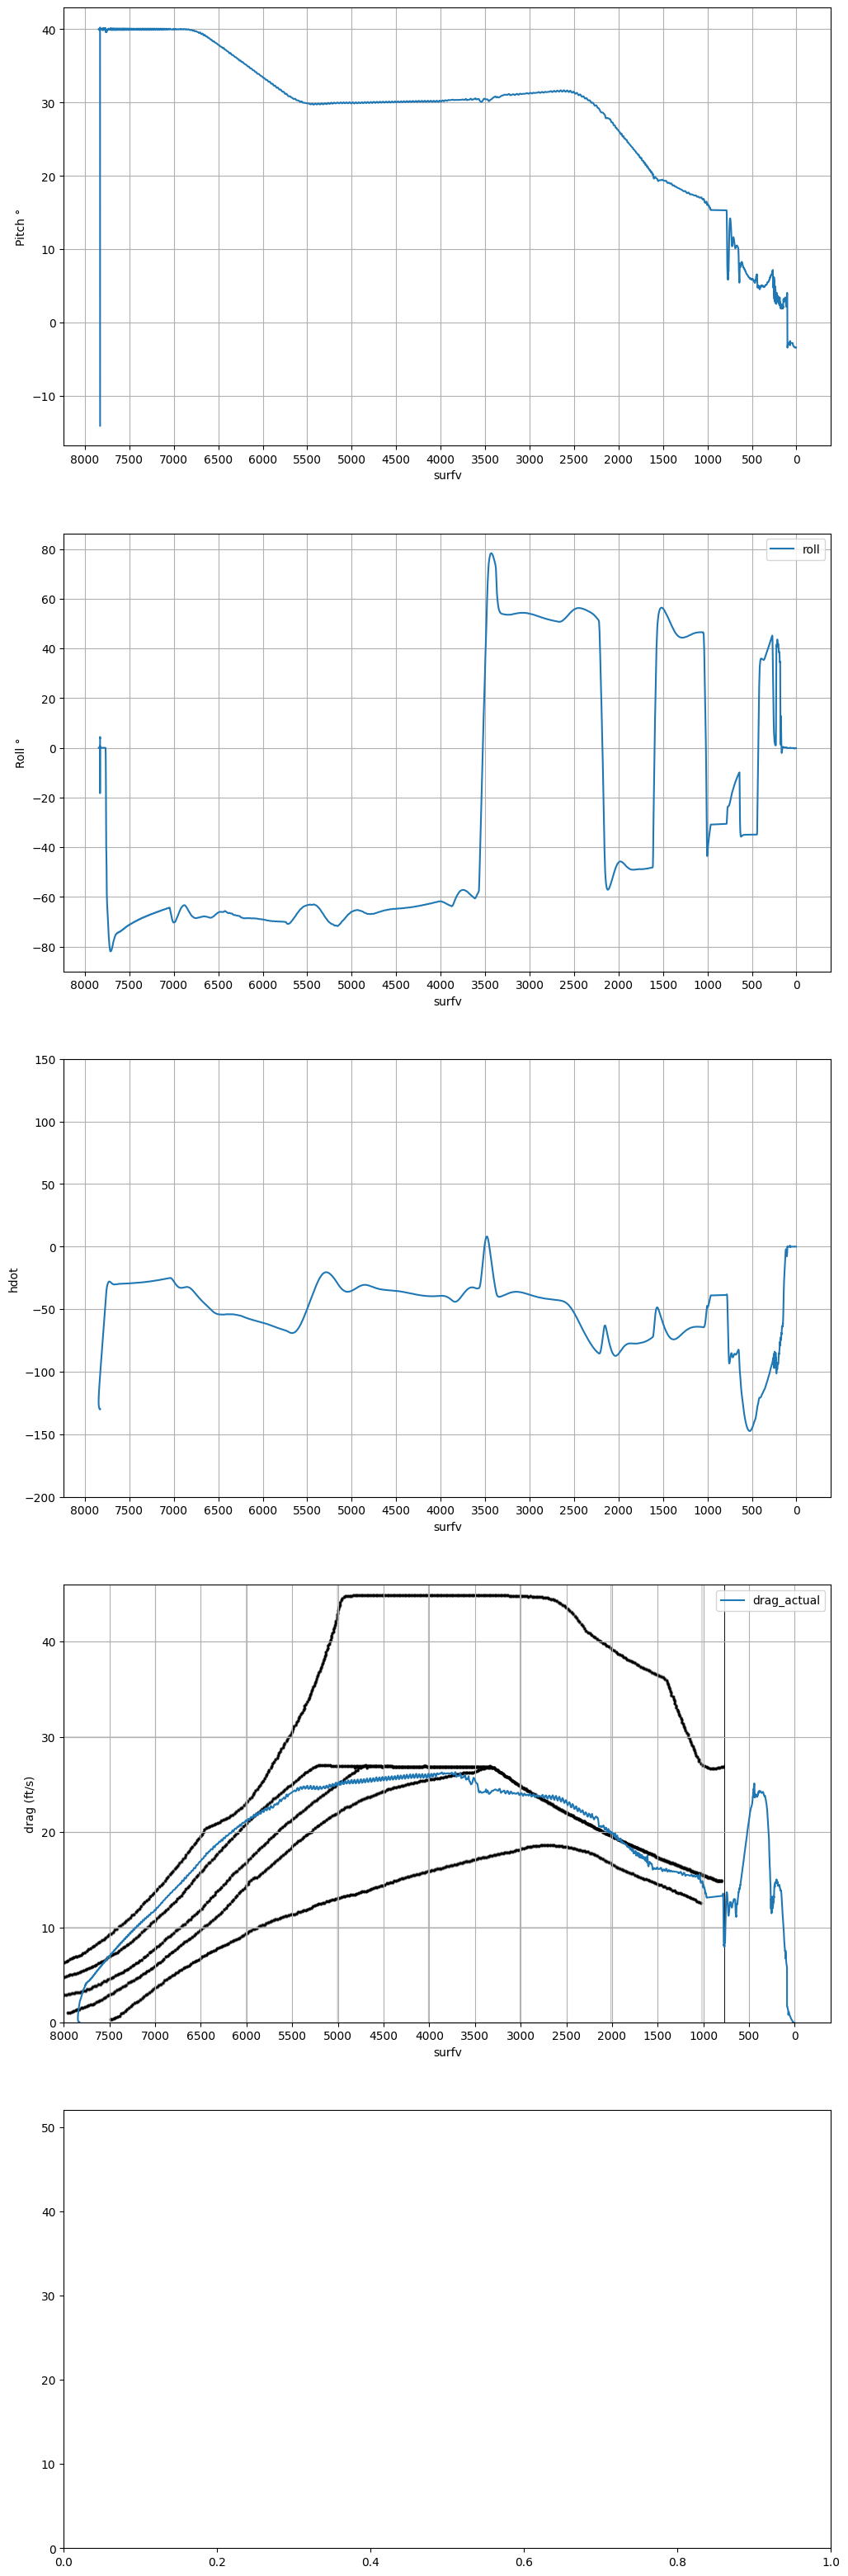

In [34]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 8 * 5))

major_ticks = np.arange(0, 8500, 500)

plt_ = ax[0]
plt_.plot(data['surfv'], data['prog_pch'])
    
plt_.set_xlabel('surfv');
plt_.set_ylabel('Pitch °')

plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt1 = plt_.plot(data['surfv'], data['prog_roll'], label='roll');


    
plt_.set_xlabel('surfv')
plt_.set_ylabel('Roll °')
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]

plt1 = plt_.plot(data['surfv'], data['hdot'])
 
plt_.set_ylim([-200, 150])

plt_.set_xlabel('surfv')
plt_.set_ylabel('hdot')
plt_.set_xticks(major_ticks)
plt_.grid()

plt_.invert_xaxis()


plt_ = ax[3]

img = plt.imread("ops3_drag.png")
plt_.imshow(img, aspect='auto', extent=[8000, 762, 0, 46], alpha=1 , cmap='Greys_r')

plt1 = plt_.plot(data['surfv'], data['drag'], label='drag_actual')
  
plt.ylim([0, 52])

plt_.set_xlabel('surfv')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()



In [ ]:
def traj_disp_new(n, data):
    if n==1:
        r_speed = (5181, 7925)
    elif n==2:
        r_speed = (4267, 5181)
    elif n==3:
        r_speed = (3200, 4267)
    elif n==4:
        r_speed = (1890, 3200)
    elif n==5:
        r_speed = (760, 1890)
        
    traj_data = data[(data['surfv'].between(*r_speed))][['range', 'surfv', 'drag', 'hdot']]

    traj_vel = traj_data['surfv'].to_numpy()
    traj_drag = traj_data['drag'].to_numpy()
    traj_color = traj_data['drag'].to_numpy()

    traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(traj_vel, traj_drag)])
    traj_y = np.array([traj_y_convert_new(n, v) for v in traj_vel])

    trajplot_lines_new(n, [traj_x, traj_y, traj_color])

def trajplot_lines_new(n, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])

    
    custom_cmap = plt.cm.get_cmap('viridis', 20)
        
    plt1 = plt_.scatter(
                       data[0],
                       data[1],
        c=data[2], cmap=custom_cmap, s=10)


    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    cbar = plt.colorbar(plt1)
    
        
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1269.3735913802313 + -0.08206361592134565 * vel**1 * drag**0 + -153.9799520644858 * vel**0 * drag**1 + -3.1466697000533627e-06 * vel**2 * drag**0 + 0.01314221307938963 * vel**1 * drag**1 + 4.662789044310247 * vel**0 * drag**2 + 7.728348100366489e-10 * vel**3 * drag**0 + -4.161746084256363e-07 * vel**2 * drag**1 + -0.00015695195109508781 * vel**1 * drag**2 + -0.052420876333425334 * vel**0 * drag**3
    elif n==2:
        return -119.27311679936585 + 0.1310360825751968 * vel**1 * drag**0 + -14.509634466688668 * vel**0 * drag**1 + -4.508956766569039e-07 * vel**2 * drag**0 + 0.0014529141150055665 * vel**1 * drag**1 + -0.004804810480900542 * vel**0 * drag**2
    elif n==3:
        return -169.89669862960386 + 0.19623953463938421 * vel**1 * drag**0 + -13.736386540438081 * vel**0 * drag**1 + -4.726735117477343e-07 * vel**2 * drag**0 + 0.00040459906559150603 * vel**1 * drag**1 + 0.07268485357148893 * vel**0 * drag**2
    elif n==4:
        return -734.5494910944298 + 0.9290782496000264 * vel**1 * drag**0 + -29.37866043040794 * vel**0 * drag**1 + -0.0001350962705991554 * vel**2 * drag**0 + 0.00109521485502761 * vel**1 * drag**1 + 0.31166666666704274 * vel**0 * drag**2
    elif n==5:
        return -365.6282303867932 + 1.0003973495016918 * vel**1 * drag**0 + -15.409853981961241 * vel**0 * drag**1 + -0.00024196873768544958 * vel**2 * drag**0 + -0.0016156332438259542 * vel**1 * drag**1 + 0.24249999999981453 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (0.00036443148 * vel - 1.88811953353)
    elif n==2:
        out = (0.0010940919 * vel - 4.66849015317)
    elif n==3:
        out = (0.00093720712 * vel - 2.99906279288)
    elif n==4:
        out = (0.00076335877 * vel - 1.4427480916)
    elif n==5:
        out = (0.00088495575 * vel - 0.67256637168)

    return  59.5 + 280.2 * out




traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)